LOAD LIBRARIES

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

LOAD THE DATA

In [5]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\Coviddata.csv")

INSPECT THE DATA

In [14]:
#Preview the data
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [16]:
#Check Basic Info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [18]:
# Check for missing values
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [20]:
#Get Statistical summaries
data.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


HANDLING MISSING VALUES

<Axes: >

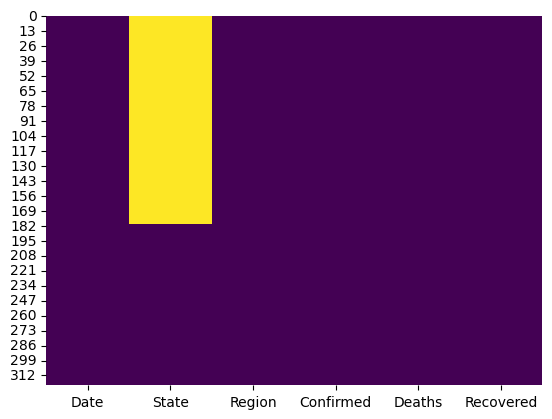

In [25]:
#Visualize missing values
sns.heatmap(data.isnull(),cbar=False,cmap="viridis")

In [27]:
#Drop the missing values

# Drop rows with missing values

data = data.dropna()

In [37]:
# Fill the missing values

data.loc[:, "State"] = data["State"].fillna("Unknown")


UNDERSTAND DATA DISTRIBUTION

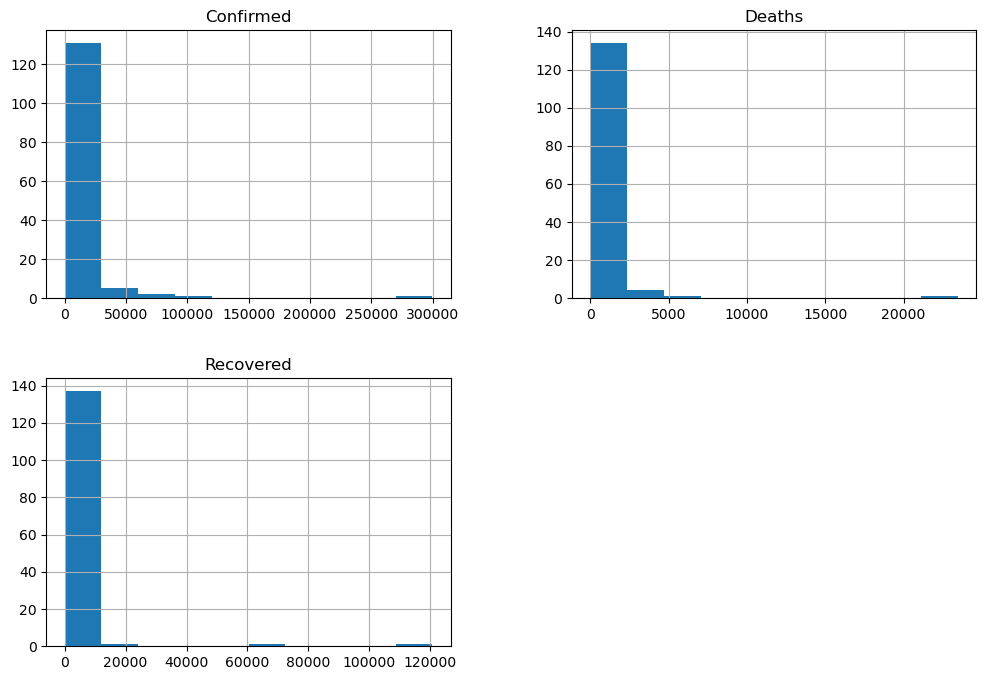

In [40]:
data.hist(figsize=(12,8))

plt.show()

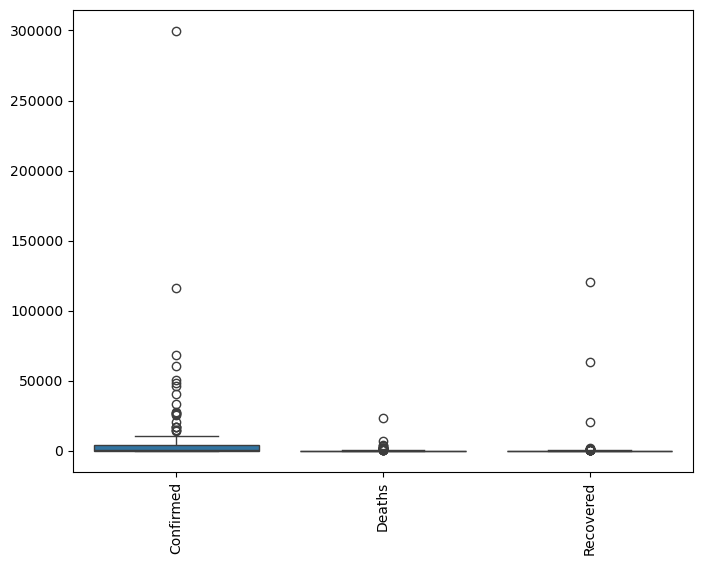

In [48]:
# Boxplot

plt.figure(figsize=(8,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

CATEGORICAL FEATURES

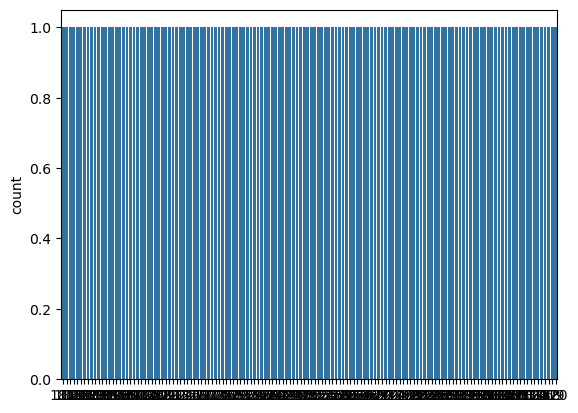

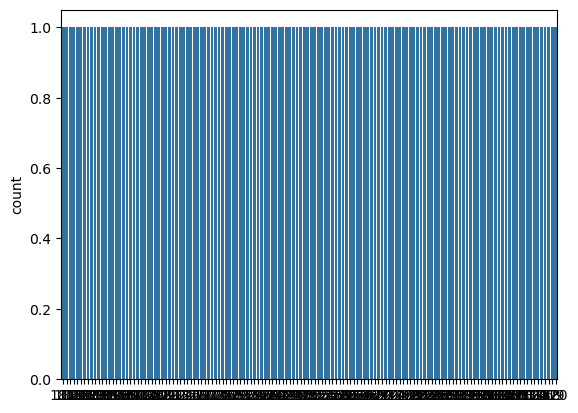

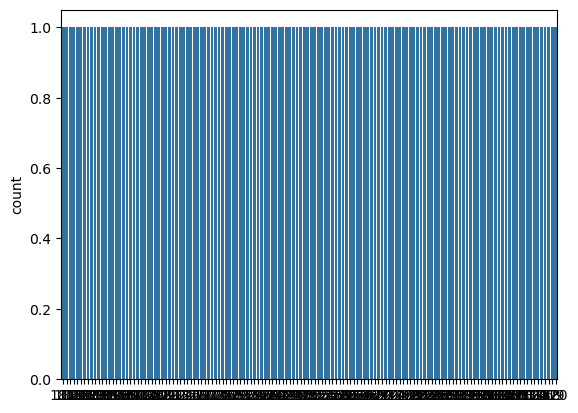

In [51]:
# Count plots
for col in ['Confirmed', 'Deaths',"Recovered"]:  
    sns.countplot(data[col])
    plt.show()


CORRELATION ANALYSIS

In [58]:
#Understand relationships between numerical featues

# Correlation matrix
#correlation_matrix = data.corr()

# Heatmap
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title("Correlation Matrix")
#plt.show()


Analyze Trends Over Time

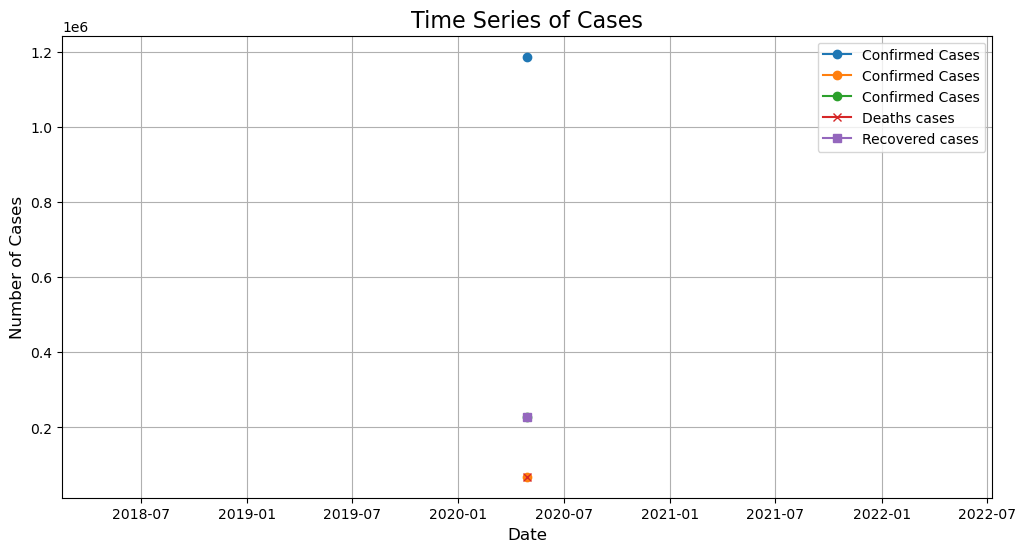

In [84]:
# Convert date column to datetime


data['Date'] = pd.to_datetime(data['Date'])

time_series = data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, marker='o', label='Confirmed Cases')
plt.plot(time_series.index, time_series['Deaths'].values, marker='x', label='Deaths cases')
plt.plot(time_series.index, time_series['Recovered'].values, marker='s', label='Recovered cases')

plt.title('Time Series of Cases', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


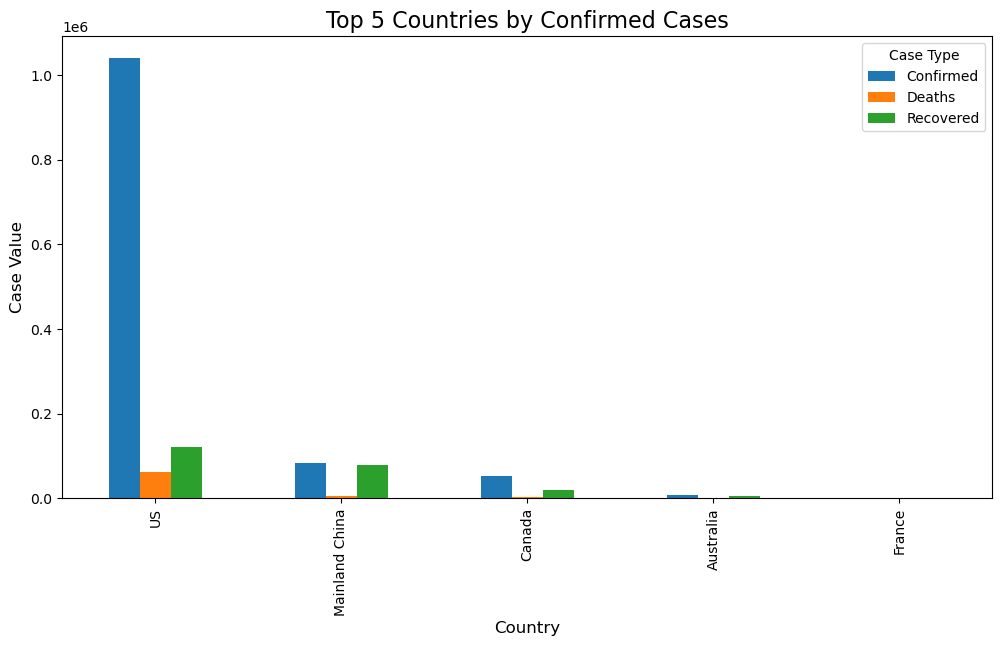

In [128]:
# Grouping by 'Region' and summing the relevant columns
country_data = data.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']]

# Bar plot for top 10 countries with actual case values
top_countries = country_data.sum().sort_values(by='Confirmed', ascending=False).head()

# Plotting the actual case values
top_countries.plot(kind='bar', figsize=(12, 6))

# Adding the title and labels
plt.title('Top 5 Countries by Confirmed Cases', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Case Value', fontsize=12)
plt.grid(False)
plt.legend(title='Case Type')
plt.show()


**INSIGHTS AND REPORTING**

#Summary: **Case Growth**
During the COVID-19 pandemic, the data reveals a clear upward trend in cases over time. 
Initially, 
the number of cases increased gradually, 
but after certain phases, especially during peak periods, the rate of growth significantly accelerated. 

#SUMMARY : **Correlation b/w dataset**
The analysis of the COVID-19 dataset highlights several key relationships between different features.
The correlation between recovery rates and cases is slightly negative, indicating that as cases rise, 
recovery rates might stabilize or slow down.This analysis provides valuable insights into how different 
factors interact and influence the spread of COVID-19, helping in understanding the drivers behind the
progression of the pandemic.

#Summary : **High-case regions**
The geographic analysis of the COVID-19 data reveals distinct patterns in the distribution of cases across different regions. 
The data shows that high-case regions are concentrated in densely populated urban areas, where the virus spread more rapidly 
due to higher population density and increased social interactions.

**Summary:** 
The majority of confirmed COVID-19 cases in the United States are concentrated in several key states, with California, Texas 
and Florida consistently reporting the highest numbers. These states have large populations, urban centers, and significant 
economic activity, which contribute to the rapid spread of the virus. Additionally, New York experienced a severe outbreak 
during the initial phase of the pandemic, making it one of the hardest-hit regions early on. Urban areas like New York City 
witnessed high transmission rates due to dense populations and frequent public interactions. These states account for a significant
portion of the national total, reflecting the varied impact of the pandemic across different regions in the US.